<a href="https://colab.research.google.com/github/joaocarvoli/Machine-Learning/blob/main/Works/02_2_work_house_price_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this competition our objective will be to deal with a <strike>regression</strike> clustering problem, a known problem, House Prices.
> `https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview`

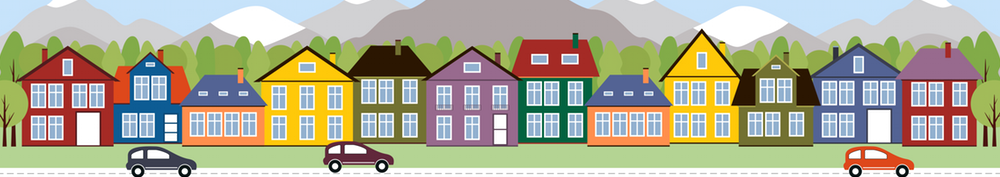

## `Bellow We'll put Kaggle description....`

#### _Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence._
#### _With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home._

`To use this problem for clustering we'll just discart the target!`

# 1. Imports:

In [1]:
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error # Pattern metric: RMSE
from sklearn.metrics import make_scorer 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import warnings
warnings.filterwarnings('ignore')

## `Data import:`

In [2]:
train = pd.read_csv('/content/drive/MyDrive/ml/data-sets/house-prices/train.csv', nrows = 1459)
test =  pd.read_csv('/content/drive/MyDrive/ml/data-sets/house-prices/test.csv')

# 2. Data analisys and Preprocessing:

In [3]:
train.drop(axis = 1, inplace = True, columns = 'SalePrice')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(f'Train size {train.shape} and Test size{test.shape}')

Train size (1459, 80) and Test size(1459, 80)


In [7]:
# Dropping ID columns
train.drop(axis = 1, inplace = True, columns = 'Id')
id_test_column = np.array(test['Id'].copy())
test.drop(axis = 1, inplace = True, columns = 'Id')

In [8]:
# Our data have null values, if yes which ones?
train.isna().sum()[train.isna().sum() != 0].sort_values(ascending = False)

PoolQC          1452
MiscFeature     1405
Alley           1368
Fence           1178
FireplaceQu      689
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
print(f'The percent of null values from train set is {train.shape[0]/train.isna().sum()[train.isna().sum() != 0].sum()*100:.2f}%')

The percent of null values from train set is 20.96%


> **Obs: The atributes that has the most nan values will be study because we need do something...**

> **FEATURES WHERE THE AMOUNT OF NULL VALUES IS HIGH**

- Alley: *This atribute is categorical and it represents the type of alley acess to the house, they hasn't a hierarchy. It has **three** possible values.*

- FireplaceQu: *This atribute is categorical and it represents the quality of house fireplace, they has a hierarchy. It has **six** possible values.*

- PollQC: *This atribute is categorical and it represents the quality of house poll, they has a hierarchy. It has **five** possible values.*

- Fence: *This atribute is categorical and it represents the quality of house fence, they has a hierarchy. It has **five** possible values.*

- MiscFeature: *This atribute is categorical and it represents the Miscellaneous feature not covered in other categories, they hasn't a hierarchy. It has **six** possible values.*

> **Another features**

- LotFrontage: *This features is numerical and it represents the Linear feet of street connected to property.*
- MasVrnType: *This feature is categorical but it not represents a hierarchy*.
- MasVrnArea: *This feature is numerical and it represents the Masonry veneer area in square feet* 
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: *These features are categorical and they represents a hierarchy.*
- Eletrical: *This feature is categorical and not represents a hierarchy.*
- GarageType, GarageFinish: *These features are categorical and not represents a hierarchy.*
- GarageYr: *This feature is categorical and not represents a hierarchy.*
- GarageQual, GarageCond: *These features are categorical and represents a hierarchy.*

In [10]:
# Dropping columns where there are more of 300, in the half of lines of train set
train.dropna(thresh=300, axis = 1, inplace = True)
test.dropna(thresh=300, axis = 1, inplace = True)

In [11]:
train.drop(axis = 1, inplace = True, columns = 'FireplaceQu')
test.drop(axis = 1, inplace = True, columns = 'FireplaceQu')

In [12]:
train.LotFrontage.fillna(np.mean(train.LotFrontage), inplace = True) # In the Lot Frontage We've numerical continuous values, therefore, We'll fill the null values with column mean
test.LotFrontage.fillna(np.mean(test.LotFrontage), inplace = True)

In [13]:
# Let's deal with missing null values
train.isna().sum()[train.isna().sum() != 0].sort_values(ascending = False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [14]:
# Dealing with missing features null
train.GarageCond.fillna(train.GarageCond.value_counts().index.tolist()[0], inplace = True)      # categorical
test.GarageCond.fillna(test.GarageCond.value_counts().index.tolist()[0], inplace = True)

train.GarageQual.fillna(train.GarageQual.value_counts().index.tolist()[0], inplace = True)      # categorical
test.GarageQual.fillna(test.GarageQual.value_counts().index.tolist()[0], inplace = True) 

train.GarageFinish.fillna(train.GarageFinish.value_counts().index.tolist()[0], inplace = True)  # categorical
test.GarageFinish.fillna(test.GarageFinish.value_counts().index.tolist()[0], inplace = True) 

train.GarageYrBlt.fillna(np.mean(train.GarageYrBlt), inplace = True)                            # numerical
test.GarageYrBlt.fillna(np.mean(test.GarageYrBlt), inplace = True)

train.GarageType.fillna(train.GarageType.value_counts().index.tolist()[0], inplace = True)      # categorical
test.GarageType.fillna(test.GarageType.value_counts().index.tolist()[0], inplace = True)

train.BsmtFinType1.fillna(train.BsmtFinType1.value_counts().index.tolist()[0], inplace = True)  # categorical and hierarchy
test.BsmtFinType1.fillna(test.BsmtFinType1.value_counts().index.tolist()[0], inplace = True)

train.BsmtFinType2.fillna(train.BsmtFinType2.value_counts().index.tolist()[0], inplace = True)  # categorical and hierarchy
test.BsmtFinType2.fillna(test.BsmtFinType2.value_counts().index.tolist()[0], inplace = True)

train.BsmtExposure.fillna(train.BsmtExposure.value_counts().index.tolist()[0], inplace = True)  # categorical and hierarchy
test.BsmtExposure.fillna(test.BsmtExposure.value_counts().index.tolist()[0], inplace = True)

train.BsmtCond.fillna(train.BsmtCond.value_counts().index.tolist()[0], inplace = True)          # categorical and hierarchy
test.BsmtCond.fillna(test.BsmtCond.value_counts().index.tolist()[0], inplace = True)

train.BsmtQual.fillna(train.BsmtQual.value_counts().index.tolist()[0], inplace = True)          # categorical and hierarchy
test.BsmtQual.fillna(test.BsmtQual.value_counts().index.tolist()[0], inplace = True)

train.MasVnrArea.fillna(np.mean(train.MasVnrArea), inplace = True)                              # numerical
test.MasVnrArea.fillna(np.mean(test.MasVnrArea), inplace = True)

train.MasVnrType.fillna(train.MasVnrType.value_counts().index.tolist()[0], inplace = True)      # categorical
test.MasVnrType.fillna(test.MasVnrType.value_counts().index.tolist()[0], inplace = True)

train.Electrical.fillna(train.Electrical.value_counts().index.tolist()[0], inplace = True)      # categorical
test.Electrical.fillna(test.Electrical.value_counts().index.tolist()[0], inplace = True)

## `Which features are categorical and numerical?`

In [15]:
# Showing and storing columns names where the type is an object and it means this column is probably categorical
categorical_columns = []

for dtype, name in zip(train.dtypes, train.dtypes.index.tolist()):
    if dtype == 'object':
        categorical_columns.append(name)
categorical_columns.sort()
categorical_columns

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [16]:
# Will be necessary to see the data description file to know each feature better
hierarchy_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterQual', 'ExterCond', 'GarageCond','GarageQual','KitchenQual', 'LandSlope', 'LotShape']
non_hierarchy_col = list(set(categorical_columns) - set(hierarchy_col))

In [17]:
hierarchy_col

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'ExterQual',
 'ExterCond',
 'GarageCond',
 'GarageQual',
 'KitchenQual',
 'LandSlope',
 'LotShape']

In [18]:
non_hierarchy_col

['Foundation',
 'BldgType',
 'SaleCondition',
 'Utilities',
 'LandContour',
 'HeatingQC',
 'Exterior2nd',
 'Heating',
 'GarageFinish',
 'Street',
 'Functional',
 'MSZoning',
 'Neighborhood',
 'Electrical',
 'RoofMatl',
 'HouseStyle',
 'PavedDrive',
 'Condition1',
 'Condition2',
 'GarageType',
 'RoofStyle',
 'LotConfig',
 'CentralAir',
 'MasVnrType',
 'SaleType',
 'Exterior1st']

### After to know if the features are categorical or non-categorical and know what is the type of categorical: let's do a map replace with features categorical-hierarchy and one hot coding with the non-hierarchy categorical

### `Map replace`

In [19]:
map_replace = {
 'BsmtCond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5},
 'BsmtExposure' : {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
 'BsmtFinType1' : {'NA':0, 'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
 'BsmtFinType2' : {'NA':0, 'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
 'BsmtQual' : {'NA': 0, 'Po':1,'Fa':2, 'TA':3,'Gd':4,'Ex':5},
 'ExterQual' : {'Po':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5},
 'ExterCond' : {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
 'GarageCond' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5},
 'GarageQual' : {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
 'KitchenQual' : {'Po':1, 'Fa':2,'TA':3, 'Gd':4,'Ex':5},
 'LandSlope' : {'Gtl':1, 'Mod':2, 'Sev':3},
 'LotShape' : {'IR3':1 ,'IR2':2 ,'IR1':3 ,'Reg':4}
}

In [20]:
train.replace(map_replace, inplace=True)
test.replace(map_replace, inplace=True)

### `One hot encoding`

In [21]:
# Seeing how are the Training columns
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [22]:
# Seeing how are the Testing columns
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [23]:
# The columns are equal?
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [24]:
train.shape, test.shape

((1459, 74), (1459, 74))

In [25]:
pd.get_dummies(data = train, columns = non_hierarchy_col)

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,CentralAir_N,CentralAir_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,4,1,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,856,854,0,1710,1,0,2,1,3,1,4,8,0,2003.0,2,548,3,3,0,...,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,4,1,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1976.0,2,460,3,3,298,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,3,1,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,920,866,0,1786,1,0,2,1,3,1,4,6,1,2001.0,2,608,3,3,0,...,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,3,1,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,961,756,0,1717,1,0,1,0,3,1,4,7,1,1998.0,3,642,3,3,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,3,1,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,2000.0,3,836,3,3,192,...,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,4,1,7,5,2004,2005,0.0,4,3,4,3,1,6,410,1,0,811,1221,1221,0,0,1221,1,0,2,0,2,1,4,6,0,2004.0,2,400,3,3,0,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1455,60,62.0,7917,4,1,6,5,1999,2000,0.0,3,3,4,3,1,1,0,1,0,953,953,953,694,0,1647,0,0,2,1,3,1,3,7,1,1999.0,2,460,3,3,0,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1456,20,85.0,13175,4,1,6,6,1978,1988,119.0,3,3,4,3,1,5,790,3,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,3,7,2,1978.0,2,500,3,3,349,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,70,66.0,9042,4,1,7,9,1941,2006,0.0,5,4,3,4,1,6,275,1,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,4,9,2,1941.0,1,252,3,3,0,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
pd.get_dummies(data = test, columns = non_hierarchy_col)

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,GarageType_Detchd,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,CentralAir_N,CentralAir_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,20,80.0,11622,4,1,5,6,1961,1961,0.0,3,3,3,3,1,3,468.0,2,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,0,1961.000000,1.0,730.0,3,3,140,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,81.0,14267,3,1,6,6,1958,1958,108.0,3,3,3,3,1,5,923.0,1,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,4.0,6,0,1958.000000,1.0,312.0,3,3,393,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,74.0,13830,3,1,5,5,1997,1998,0.0,3,3,4,3,1,6,791.0,1,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,1,1997.000000,2.0,482.0,3,3,212,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,60,78.0,9978,3,1,6,6,1998,1998,20.0,3,3,3,3,1,6,602.0,1,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,4.0,7,1,1998.000000,2.0,470.0,3,3,360,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,120,43.0,5005,3,1,8,5,1992,1992,0.0,4,3,4,3,1,5,263.0,1,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,4.0,5,0,1992.000000,2.0,506.0,3,3,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,1,4,7,1970,1970,0.0,3,3,3,3,1,1,0.0,1,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,0,1977.721217,0.0,0.0,3,3,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1455,160,21.0,1894,4,1,4,5,1970,1970,0.0,3,3,3,3,1,3,252.0,1,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,0,1970.000000,1.0,286.0,3,3,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1456,20,160.0,20000,4,1,5,7,1960,1996,0.0,3,3,3,3,1,5,1224.0,1,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,1,1960.000000,2.0,576.0,3,3,474,...,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1457,85,62.0,10441,4,1,5,5,1992,1992,0.0,3,3,4,3,3,6,337.0,1,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,3.0,6,0,1977.721217,0.0,0.0,3,3,80,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
train.shape, test.shape

((1459, 74), (1459, 74))

In [28]:
train = pd.concat([train, pd.get_dummies(data = train, columns = non_hierarchy_col)], axis=1)
test = pd.concat([test, pd.get_dummies(data = test, columns = non_hierarchy_col)], axis=1)
print(f'Train size {train.shape} and Test size{test.shape}')

Train size (1459, 302) and Test size(1459, 287)


### Different results are generated because the test set would have fewer values and when this happens fewer columns are generated, making the number of columns different.

In [29]:
# Removing the columns where the get_dummies was applied
train.drop(axis = 1, inplace = True, columns = non_hierarchy_col)
test.drop(axis = 1, inplace = True, columns = non_hierarchy_col)

In [30]:
# Storing the columns that are equal between the two datasets, if it doesn't do there will be a problem in the predict because the train and predict features are differents
intersect_cols = list(set(train.columns.tolist()) & set(test.columns.tolist()))
print('The above result is all columns between the two dataset')

The above result is all columns between the two dataset


In [31]:
train = train[intersect_cols].T.drop_duplicates().T
test  = test[intersect_cols].T.drop_duplicates().T
print(f'Train size {train.shape} and Test size{test.shape}')

Train size (1459, 212) and Test size(1459, 212)


## `Reducing our size data`

In [32]:
def reduce_mem_usage_automatic(df):
    """Reduces the memory usage of the given dataframe.
    Parameter
    ---------
    df : dataframe
        The input data to which the operation of memory reduction will be performed.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    #print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if "int" in str(col_type):
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                df[col] = df[col].astype(np.uint8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                df[col] = df[col].astype(np.uint16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                df[col] = df[col].astype(np.uint32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)
            elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                df[col] = df[col].astype(np.uint64)
        elif col_type == np.float:
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

reduce_mem_usage_automatic(train)
reduce_mem_usage_automatic(test)

Memory usage after optimization is: 0.59 MB
Decreased by 74.9%
Memory usage after optimization is: 0.59 MB
Decreased by 75.0%


## `Removing nan values`

In [33]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

train = clean_dataset(train)
#test = clean_dataset(test)

## `Splitting our data:`

In [34]:
X_train = train.copy()
X_test = test.copy()

## `Scaling:`

In [35]:
scaler_min_max = MinMaxScaler()
X_train_minmax = scaler_min_max.fit_transform(X_train)
X_test_minmax = scaler_min_max.transform(X_test)


scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# 3. Algorithms:

In [52]:
results = {'scaler':[], 'inertia':[], 'k':[]}
scalers = [None, 'minmax', 'std']

In [53]:
inertias = []
inertias2 = []
inertias3 = []

for scale in scalers:
    if scale == None:
        for k in range(1, 50):
            cluster = KMeans(n_clusters=k, random_state=42, init='k-means++')
            cluster.fit(X_train)
            results['scaler'].append(scale)
            results['inertia'].append(cluster.inertia_)
            results['k'].append(k)
            inertias.append(cluster.inertia_)
    elif scale == 'minmax':
        for k in range(1, 50):
            cluster = KMeans(n_clusters=k, random_state=42, init='k-means++')
            cluster.fit(X_train_minmax)
            results['scaler'].append(scale)
            results['inertia'].append(cluster.inertia_)
            results['k'].append(k)
            inertias2.append(cluster.inertia_)
    else:
        for k in range(1, 50):
            cluster = KMeans(n_clusters=k, random_state=42,  init='k-means++')
            cluster.fit(X_train_minmax)
            results['scaler'].append(scale)
            results['inertia'].append(cluster.inertia_)
            results['k'].append(k)
            inertias3.append(cluster.inertia_)

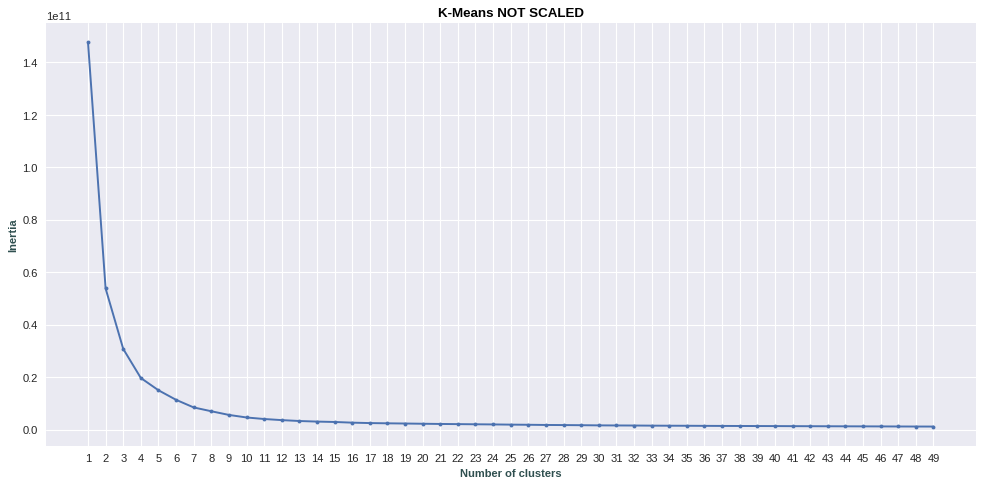

In [54]:
x = np.arange(1, 50)
plt.figure(figsize=(15, 7), dpi=80)


plt.title('K-Means NOT SCALED', fontweight='bold', fontsize=12, color='black')

plt.ylabel('Inertia',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of clusters',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")

plt.plot(x, inertias, '.-')
plt.xticks(x)

plt.show()

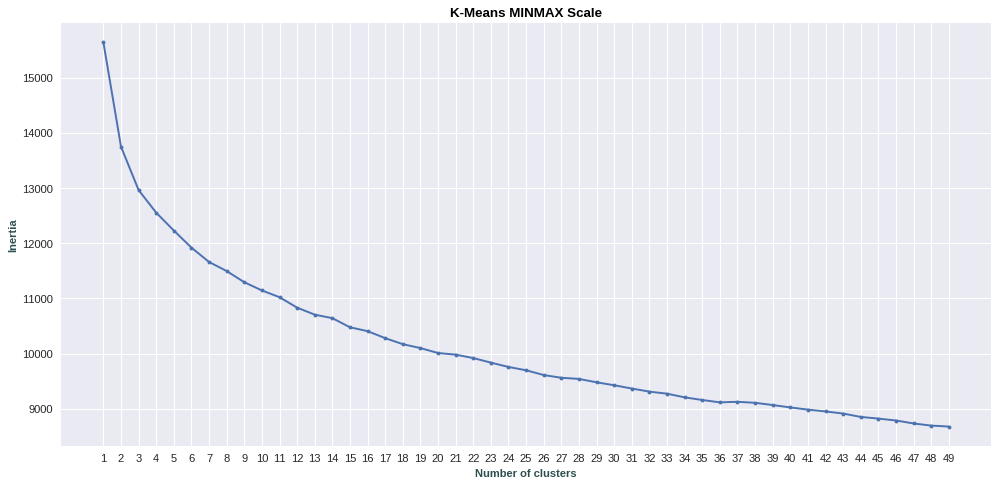

In [55]:
plt.figure(figsize=(15, 7), dpi=80)

plt.title('K-Means MINMAX Scale', fontweight='bold', fontsize=12, color='black')

plt.ylabel('Inertia',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of clusters',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")

plt.plot(x, inertias2, '.-')
plt.xticks(x)

plt.show()

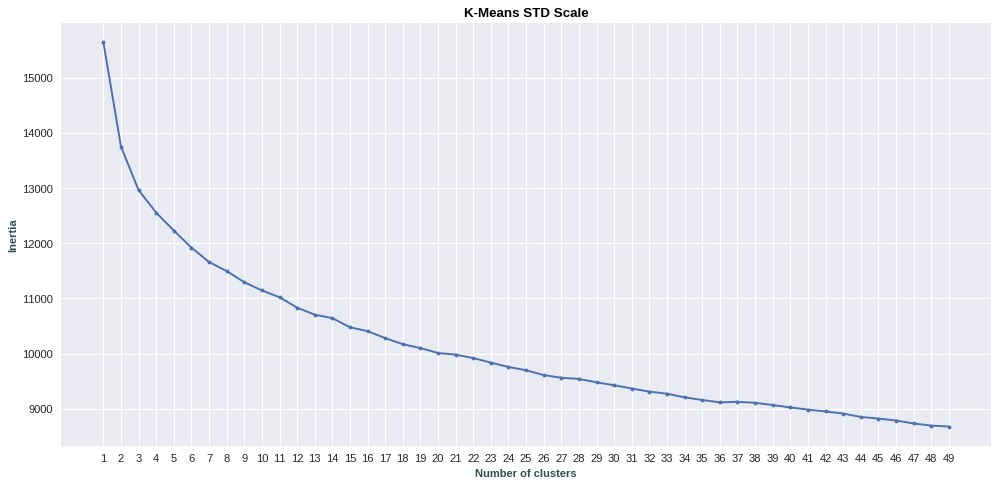

In [56]:
plt.figure(figsize=(15, 7), dpi=80)

plt.title('K-Means STD Scale', fontweight='bold', fontsize=12, color='black')

plt.ylabel('Inertia',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of clusters',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")

plt.plot(x, inertias3, '.-')
plt.xticks(x)

plt.show()

In [74]:
results = pd.DataFrame(results)
results.sort_values(by = 'inertia', ascending = True)

,scaler,inertia,k
146,std,8.678501e+03,49
97,minmax,8.678501e+03,49
96,minmax,8.695883e+03,48
145,std,8.695883e+03,48
95,minmax,8.734593e+03,47
...,...,...,...
4,None,1.498909e+10,5
3,None,1.966405e+10,4
2,None,3.075484e+10,3
1,None,5.378951e+10,2


### Quantifying the quality of clustering via silhouette plots 

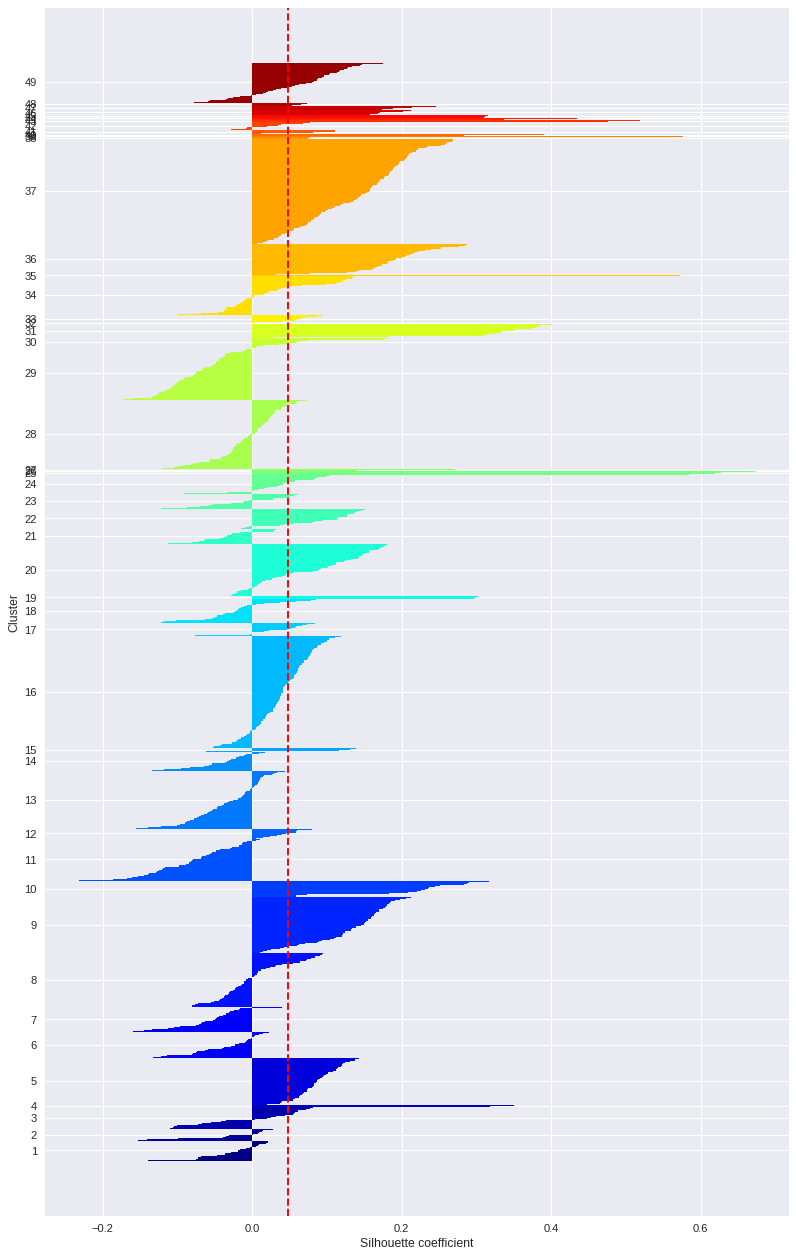

In [58]:
plt.figure(figsize=(12, 20), dpi=80)

km = KMeans(n_clusters=49, 
            init='k-means++', 
            random_state=42)
y_km = km.fit_predict(X_train_std)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X_train_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)


plt.axvline(silhouette_avg, color="red", linestyle="--") 


plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## `Applying the best K-means result to the test set and seeing the inertia metric`

In [69]:
X_test_std = pd.DataFrame(X_test_std)
X_test_std.fillna(value = 0, inplace = True)
X_test_std = clean_dataset(X_test_std)

In [71]:
k_means = KMeans(n_clusters=49, random_state=42).fit(X_test_std)
k_means.inertia_

3123934.9515807317

### Quantifying the quality of clustering via silhouette plots in test set

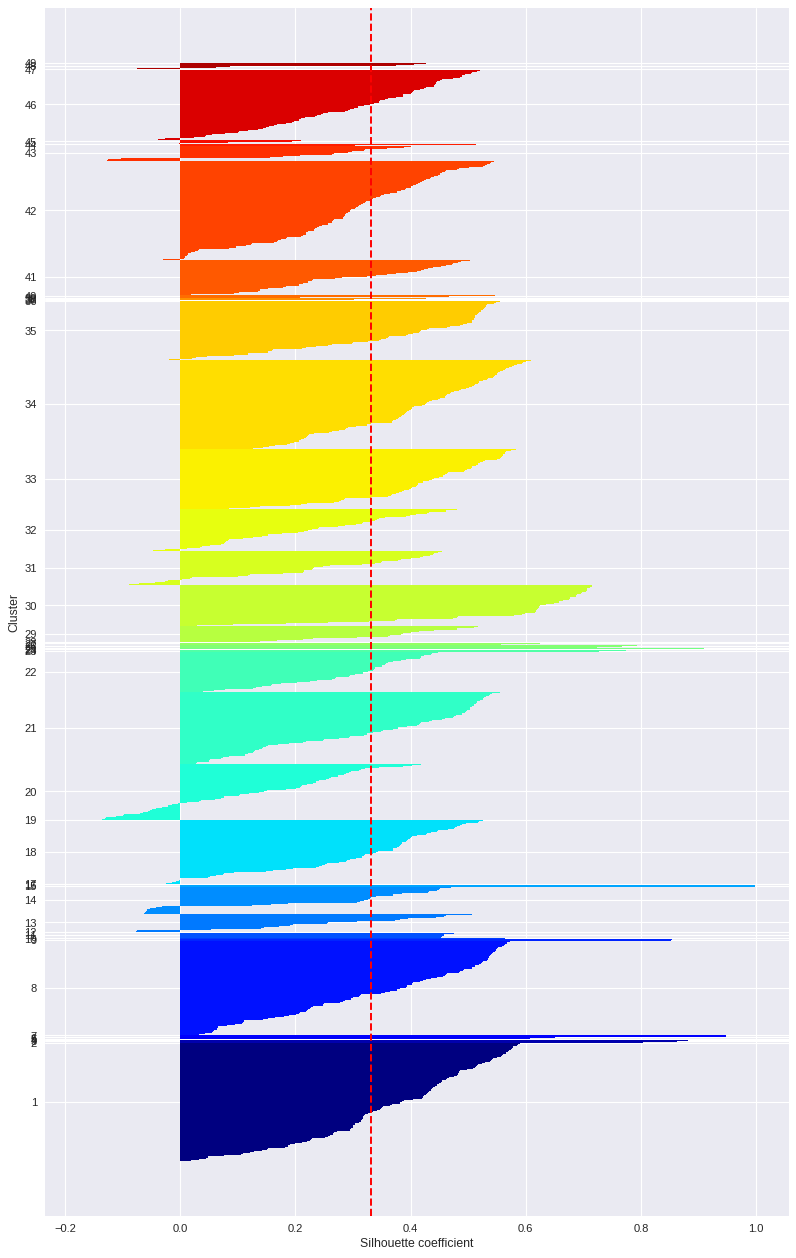

In [72]:
plt.figure(figsize=(12, 20), dpi=80)

km = KMeans(n_clusters=49, 
            init='k-means++', 
            random_state=42)
y_km = km.fit_predict(X_test_std)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X_test_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)


plt.axvline(silhouette_avg, color="red", linestyle="--") 


plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()